In [1]:
import tensorflow as tf

In [5]:
%config Completer.use_jedi = False

In [2]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [3]:
print(tf.test.is_built_with_cuda())

True


In [4]:
print(tf.test.is_gpu_available())

True


In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [14]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of ResNet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [16]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [17]:
# useful for getting number of output classes
folders = glob('Datasets/train/*')

In [18]:
folders

['Datasets/train\\audi',
 'Datasets/train\\lamborghini',
 'Datasets/train\\mercedes']

In [19]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [20]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [21]:
# view the structure of the model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [22]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [26]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 4s 2s/step - loss: 8.1012 - accuracy: 0.2812 - val_loss: 9.9754 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 1s 403ms/step - loss: 6.2588 - accuracy: 0.4062 - val_loss: 5.9174 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 1s 614ms/step - loss: 5.6578 - accuracy: 0.4219 - val_loss: 3.9358 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 1s 396ms/step - loss: 4.7529 - accuracy: 0.4375 - val_loss: 2.4045 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 483ms/step - loss: 2.0337 - accuracy: 0.3906 - val_loss: 5.0283 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 700ms/step - loss: 3.1448 - accuracy: 0.4219 - val_loss: 2.2207 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 431ms/step - loss: 1.3041 - accura

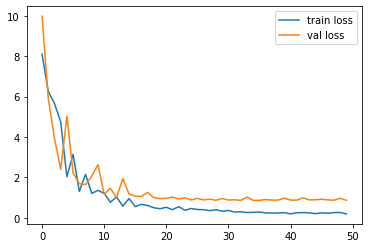

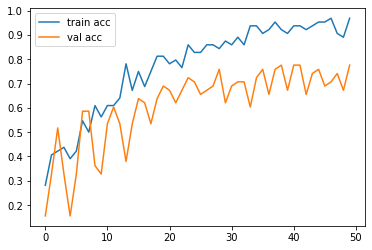

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [30]:
y_pred = model.predict(test_set)

In [31]:
y_pred

array([[1.15788523e-02, 6.34355664e-01, 3.54065478e-01],
       [8.90501123e-03, 4.57852542e-01, 5.33242404e-01],
       [3.27276699e-02, 7.30220556e-01, 2.37051755e-01],
       [7.86190853e-02, 6.05957091e-01, 3.15423787e-01],
       [5.17198630e-02, 3.29375325e-04, 9.47950780e-01],
       [1.47804409e-01, 4.85494107e-01, 3.66701514e-01],
       [3.35366768e-03, 9.91071105e-01, 5.57527458e-03],
       [8.54936421e-01, 1.14765652e-02, 1.33587003e-01],
       [1.17806412e-01, 2.52946336e-02, 8.56898963e-01],
       [1.19596638e-01, 5.05219162e-01, 3.75184208e-01],
       [7.77237952e-01, 1.85978785e-01, 3.67832296e-02],
       [2.82070809e-03, 9.94010627e-01, 3.16865765e-03],
       [1.74069643e-01, 6.71516180e-01, 1.54414207e-01],
       [8.93921879e-06, 2.26324750e-03, 9.97727811e-01],
       [9.38576460e-01, 3.33453193e-02, 2.80781258e-02],
       [4.74799901e-01, 3.51374149e-01, 1.73825994e-01],
       [2.05149099e-01, 5.16656041e-01, 2.78194934e-01],
       [7.72997141e-02, 7.54775

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [33]:
y_pred

array([1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2,
       0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [34]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [35]:
model=load_model('model_resnet50.h5')

In [46]:
img=image.load_img('Datasets/Test/lamborghini/10.jpg',target_size=(224,224))

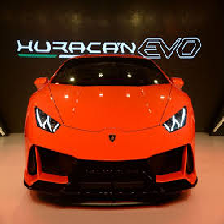

In [48]:
img

In [49]:
x=image.img_to_array(img)
x

array([[[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        ...,
        [ 13.,   2.,   0.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 17.,   7.,   0.],
        [ 17.,   7.,   0.],
        [ 18.,   8.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       [[ 18.,   8.,   0.],
        [ 18.,   8.,   0.],
        [ 19.,   9.,   0.],
        ...,
        [ 14.,   3.,   1.],
        [ 14.,   4.,   3.],
        [ 14.,   4.,   3.]],

       ...,

       [[209., 129.,  92.],
        [210., 130.,  93.],
        [212., 132.,  95.],
        ...,
        [216., 132.,  96.],
        [214., 129.,  92.],
        [213., 129.,  92.]],

       [[208., 128.,  91.],
        [208., 128.,  91.],
        [211., 131.,  94.],
        ...,
        [215., 131.,  95.],
        [209., 129.,  94.],
        [207., 129.,  93.]],

       [[206., 128.,  90.],
        [206., 128.,  90.],
        [209., 1

In [50]:
x.shape

(224, 224, 3)

In [51]:
x=x/255

In [52]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [53]:
model.predict(img_data)

array([[0.01982414, 0.09790581, 0.8822701 ]], dtype=float32)

In [54]:
a=np.argmax(model.predict(img_data), axis=1)

In [55]:
a == 2

array([ True])